#  CLASSIFIER for severity gauging to Identify Highly Likely COVID CASES

# BASIC MODEL

In [317]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt 
%matplotlib inline
#plt.style.use('seaborn')

CovidCF = pd.read_csv("PAML_COVID_Dataset.csv")
CovidCF.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,Gender,ConfirmedForeignNational,Age,Serious_symptoms,Less_common_symptoms,Most_common_symptoms,Severity,Patient_Status
0,30/01/20,6:00 PM,Kerala,1,Female,0,22,difficulty breathing or shortness of breath,headache,tiredness,Mild,Covid
1,31/01/20,6:00 PM,Kerala,1,Male,0,22,chest pain or pressure,sore throat,dry cough,Seviour,flu
2,1/2/2020,6:00 PM,Kerala,2,Male,0,100,loss of speech or movement,headache,dry cough,Mild,Covid
3,2/2/2020,6:00 PM,Kerala,3,Female,0,66,chest pain or pressure,headache,fever,Mild,Covid
4,3/2/2020,6:00 PM,Kerala,3,Male,0,45,chest pain or pressure,aches and pains,fever,Mild,flu


In [318]:
CovidCLF = CovidCF[['Age','Serious_symptoms','Less_common_symptoms','Most_common_symptoms','Severity','Patient_Status']]

In [319]:
SS = CovidCLF['Serious_symptoms'].unique()
SS

array(['difficulty breathing or shortness of breath',
       'chest pain or pressure', 'loss of speech or movement'],
      dtype=object)

In [320]:
LCS = CovidCLF['Less_common_symptoms'].unique()
LCS

array(['headache', 'sore throat', 'aches and pains', 'conjunctivitis',
       'loss of taste or smell',
       'a rash on skin, or discolouration of fingers or toes',
       'diarrhoea'], dtype=object)

In [321]:
MCS = CovidCLF['Most_common_symptoms'].unique()
MCS

array(['tiredness', 'dry cough', 'fever'], dtype=object)

In [322]:
SVT = CovidCLF['Severity'].unique()
SVT

array(['Mild', 'Seviour', 'Moderate'], dtype=object)

In [323]:
PST = CovidCLF['Patient_Status'].unique()
PST

array(['Covid', 'flu'], dtype=object)

In [324]:
def SSWT(Serious_symptoms):
        return 1

def LCSWT(Less_common_symptoms):
        return 1

def MCSWT(Most_common_symptoms):
        return 1

def SVTWT(Severity):
    if Severity == 'Mild':
        return 1
    elif Severity == 'Moderate':
        return 2
    else:
        return 3

def PSCT(Patient_Status):
    if Patient_Status == 'Covid':
        return 1
    else:
        return 0
    
def AGEW(Age):
    return Age


In [325]:
CovidCLF

,Age,Serious_symptoms,Less_common_symptoms,Most_common_symptoms,Severity,Patient_Status
0,22,difficulty breathing or shortness of breath,headache,tiredness,Mild,Covid
1,22,chest pain or pressure,sore throat,dry cough,Seviour,flu
2,100,loss of speech or movement,headache,dry cough,Mild,Covid
3,66,chest pain or pressure,headache,fever,Mild,Covid
4,45,chest pain or pressure,aches and pains,fever,Mild,flu
...,...,...,...,...,...,...
3130,61,difficulty breathing or shortness of breath,diarrhoea,dry cough,Moderate,Covid
3131,73,loss of speech or movement,aches and pains,dry cough,Moderate,flu
3132,89,difficulty breathing or shortness of breath,sore throat,fever,Mild,Covid
3133,35,loss of speech or movement,sore throat,dry cough,Moderate,Covid


In [326]:
SSWT1 = CovidCLF['Serious_symptoms'].apply(SSWT).tolist()
LCSWT1 = CovidCLF['Less_common_symptoms'].apply(LCSWT).tolist()
MCSWT1 = CovidCLF['Most_common_symptoms'].apply(MCSWT).tolist()
SVTWT1 = CovidCLF['Severity'].apply(SVTWT).tolist()
PSCT1 = CovidCLF['Patient_Status'].apply(PSCT).tolist()

AGEW1 = CovidCLF['Age'].apply(AGEW).tolist()

SimCovid = pd.DataFrame(np.column_stack([AGEW1,SSWT1,LCSWT1,MCSWT1,SVTWT1,PSCT1]),
                        columns=['AGEW1','SSWT1','LCSWT1','MCSWT1','SVTWT1','PSCT1'])
SimCovid

,AGEW1,SSWT1,LCSWT1,MCSWT1,SVTWT1,PSCT1
0,22,1,1,1,1,1
1,22,1,1,1,3,0
2,100,1,1,1,1,1
3,66,1,1,1,1,1
4,45,1,1,1,1,0
...,...,...,...,...,...,...
3130,61,1,1,1,2,1
3131,73,1,1,1,2,0
3132,89,1,1,1,1,1
3133,35,1,1,1,2,1


In [327]:
Data = np.array([AGEW1,SSWT1,LCSWT1,MCSWT1,SVTWT1]).transpose()
Data.shape

(3135, 5)

In [328]:
Target = np.array(PSCT1)
Target.shape

(3135,)

In [329]:
X = Data
y = Target

In [330]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [331]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3,random_state=21, stratify=y)

In [332]:
X_train.shape

(2194, 5)

In [333]:
X_test.shape

(941, 5)

In [334]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [335]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [336]:
y_pred = knn.predict(X_test)
print(y_pred)

[0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0
 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0
 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1
 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1
 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0
 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0
 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1
 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0
 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0
 0 0 0 0 0 1 0 1 1 0 0 1 

In [337]:
 accuracy_score(y_test, y_pred)

0.4824654622741764

# ENHANCING THE MODEL

In [338]:
CovidCLF.head()

,Age,Serious_symptoms,Less_common_symptoms,Most_common_symptoms,Severity,Patient_Status
0,22,difficulty breathing or shortness of breath,headache,tiredness,Mild,Covid
1,22,chest pain or pressure,sore throat,dry cough,Seviour,flu
2,100,loss of speech or movement,headache,dry cough,Mild,Covid
3,66,chest pain or pressure,headache,fever,Mild,Covid
4,45,chest pain or pressure,aches and pains,fever,Mild,flu


In [339]:
def XAGE(Age):
    if(0<= Age <=20):
        return 'G0'
    elif(20< Age <=40):
        return 'G1'
    elif(40< Age <=60):
        return 'G2'
    elif(60< Age <=80):
        return 'G3'
    else:
        return 'G4'


In [340]:
CovidCLF['XAge'] = CovidCLF['Age'].apply(XAGE)

C:\Users\SUDIP SINGH\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [341]:
CovidCLF.head()

,Age,Serious_symptoms,Less_common_symptoms,Most_common_symptoms,Severity,Patient_Status,XAge
0,22,difficulty breathing or shortness of breath,headache,tiredness,Mild,Covid,G1
1,22,chest pain or pressure,sore throat,dry cough,Seviour,flu,G1
2,100,loss of speech or movement,headache,dry cough,Mild,Covid,G4
3,66,chest pain or pressure,headache,fever,Mild,Covid,G3
4,45,chest pain or pressure,aches and pains,fever,Mild,flu,G2


In [342]:
Covid = CovidCLF[CovidCLF['Patient_Status'] == 'Covid']

In [343]:
Covid.head()

,Age,Serious_symptoms,Less_common_symptoms,Most_common_symptoms,Severity,Patient_Status,XAge
0,22,difficulty breathing or shortness of breath,headache,tiredness,Mild,Covid,G1
2,100,loss of speech or movement,headache,dry cough,Mild,Covid,G4
3,66,chest pain or pressure,headache,fever,Mild,Covid,G3
11,39,chest pain or pressure,headache,dry cough,Moderate,Covid,G1
12,14,chest pain or pressure,aches and pains,dry cough,Seviour,Covid,G0


chest pain or pressure                         0.173206
difficulty breathing or shortness of breath    0.171930
loss of speech or movement                     0.156300
Name: Serious_symptoms, dtype: float64


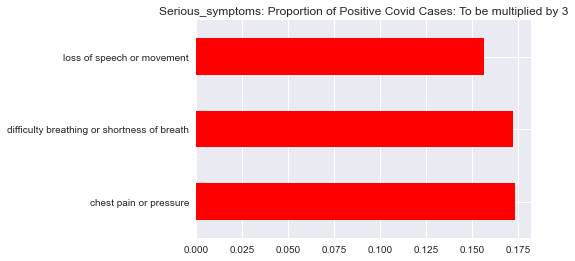

chest pain or pressure                         0.519617
difficulty breathing or shortness of breath    0.515789
loss of speech or movement                     0.468900
Name: Serious_symptoms, dtype: float64


In [344]:
SSWT2 = Covid['Serious_symptoms'].value_counts()/len(CovidCLF)
print(SSWT2)
SSWT2.plot(kind = 'barh', color = 'red', title = 'Serious_symptoms: Proportion of Positive Covid Cases: To be multiplied by 3')
plt.show()
WMSSWT2 = SSWT2*3
print(WMSSWT2)

In [345]:
def SSWTX(Serious_symptoms):
    if Serious_symptoms == 'chest pain or pressure':
        return 3*0.173206
    elif Serious_symptoms == 'difficulty breathing or shortness of breath':
        return 3*0.171930
    elif Serious_symptoms == 'loss of speech or movement':
        return 3*0.156300
    else:
        return 0

sore throat                                             0.078150
diarrhoea                                               0.077831
a rash on skin, or discolouration of fingers or toes    0.074003
aches and pains                                         0.070494
conjunctivitis                                          0.070175
headache                                                0.069219
loss of taste or smell                                  0.061563
Name: Less_common_symptoms, dtype: float64


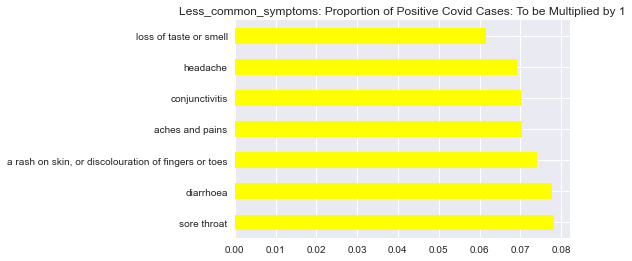

sore throat                                             0.078150
diarrhoea                                               0.077831
a rash on skin, or discolouration of fingers or toes    0.074003
aches and pains                                         0.070494
conjunctivitis                                          0.070175
headache                                                0.069219
loss of taste or smell                                  0.061563
Name: Less_common_symptoms, dtype: float64


In [346]:
LCSWT2 = Covid['Less_common_symptoms'].value_counts()/len(CovidCLF)
print(LCSWT2)
LCSWT2.plot(kind='barh', color = 'yellow', title = 'Less_common_symptoms: Proportion of Positive Covid Cases: To be Multiplied by 1')
plt.show()
WMLCSWT2 = LCSWT2*1
print(WMLCSWT2)

In [347]:
def LCSWTX(Less_common_symptoms):
    if Less_common_symptoms == 'sore throat':
        return 1*0.078150
    elif Less_common_symptoms == 'diarrhoea':
        return 1*0.077831
    elif Less_common_symptoms == 'a rash on skin, or discolouration of fingers or toes':
        return 1*0.074003
    elif Less_common_symptoms == 'aches and pains':
        return 1*0.070494
    elif Less_common_symptoms == 'conjunctivitis':
        return 1*0.070175
    elif Less_common_symptoms == 'headache':
        return 1*0.069219
    elif Less_common_symptoms == 'loss of taste or smell':
        return 1*0.061563
    else:
        return 0

fever        0.174482
tiredness    0.164274
dry cough    0.162679
Name: Most_common_symptoms, dtype: float64


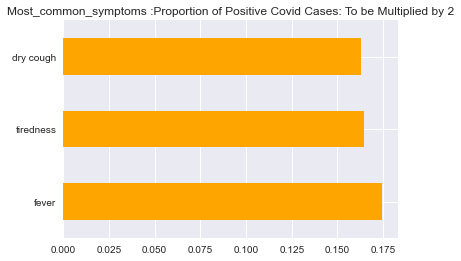

fever        0.348963
tiredness    0.328549
dry cough    0.325359
Name: Most_common_symptoms, dtype: float64


In [348]:
MCSWT2 = Covid['Most_common_symptoms'].value_counts()/len(CovidCLF)
print(MCSWT2)
MCSWT2.plot(kind='barh', color = 'orange',title = 'Most_common_symptoms :Proportion of Positive Covid Cases: To be Multiplied by 2')
plt.show()
WMMCSWT2 = MCSWT2*2
print(WMMCSWT2)

In [349]:
def MCSWTX(Most_common_symptoms):
    if Most_common_symptoms == 'fever':
        return 2*0.174482
    elif Most_common_symptoms == 'tiredness':
        return 2*0.164274
    elif Most_common_symptoms == 'dry cough':
        return 2*0.162679
    else:
        return 0

Seviour     0.171930
Mild        0.170973
Moderate    0.158533
Name: Severity, dtype: float64


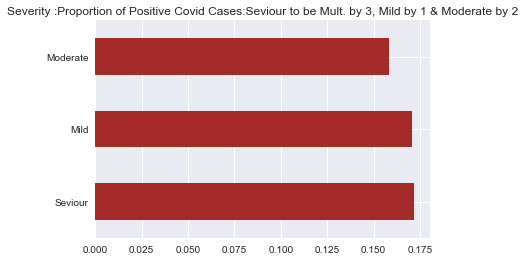

Seviour     0.515789
Mild        0.170973
Moderate    0.317065
Name: Severity, dtype: float64


In [350]:
SVTWT2 = Covid['Severity'].value_counts()/len(CovidCLF)
print(SVTWT2)
SVTWT2.plot(kind='barh', color = 'brown',title = 'Severity :Proportion of Positive Covid Cases:Seviour to be Mult. by 3, Mild by 1 & Moderate by 2' )
plt.show()
WEIGHT = [3,1,2]
WMSVTWT2 = SVTWT2*WEIGHT
print(WMSVTWT2)

In [351]:
def SVTWTX(Severity):
    if Severity == 'Seviour':
        return 3*0.171930
    elif Severity == 'Mild':
        return 1*0.170973
    elif Severity == 'Moderate':
        return 2*0.158533
    else:
        return 0

In [352]:
def PSCTX(Patient_Status):
    if Patient_Status == 'Covid':
        return 1
    else:
        return 0

G1    0.115470
G4    0.111643
G2    0.096651
G3    0.093461
G0    0.084211
Name: XAge, dtype: float64


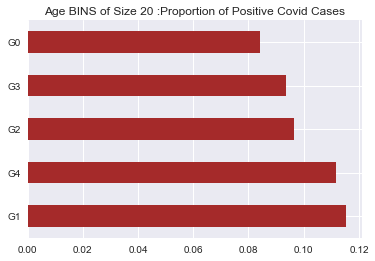

G1    0.115470
G4    0.111643
G2    0.096651
G3    0.093461
G0    0.084211
Name: XAge, dtype: float64


In [353]:
XAGEWT2 = Covid['XAge'].value_counts()/len(CovidCLF)
print(XAGEWT2)
XAGEWT2.plot(kind='barh', color = 'brown',title = 'Age BINS of Size 20 :Proportion of Positive Covid Cases' )
plt.show()
WMXAGEWT2 = XAGEWT2*1
print(WMXAGEWT2)

In [354]:
def XAGEWX(XAge):
    if XAge == 'G1':
        return 2*0.115470
    elif XAge == 'G4':
        return 5*0.111643
    elif XAge == 'G2':
        return 3*0.096651
    elif XAge == 'G3':
        return 4*0.093461
    elif XAge == 'G0':
        return 1*0.084211
    else:
        return 0

In [355]:
SSWTX1 = CovidCLF['Serious_symptoms'].apply(SSWTX).tolist()
LCSWTX1 = CovidCLF['Less_common_symptoms'].apply(LCSWTX).tolist()
MCSWTX1 = CovidCLF['Most_common_symptoms'].apply(MCSWTX).tolist()
SVTWTX1 = CovidCLF['Severity'].apply(SVTWTX).tolist()
PSCTX1 = CovidCLF['Patient_Status'].apply(PSCTX).tolist()
XAGEWX1 = CovidCLF['XAge'].apply(XAGEWX).tolist()

SimCovidX = pd.DataFrame(np.column_stack([XAGEWX1,SSWTX1,LCSWTX1,MCSWTX1,SVTWTX1,PSCTX1]),
                        columns=['XAGEWX1','SSWTX1','LCSWTX1','MCSWTX1','SVTWTX1','PSCTX1'])
SimCovidX

,XAGEWX1,SSWTX1,LCSWTX1,MCSWTX1,SVTWTX1,PSCTX1
0,0.230940,0.515790,0.069219,0.328548,0.170973,1.0
1,0.230940,0.519618,0.078150,0.325358,0.515790,0.0
2,0.558215,0.468900,0.069219,0.325358,0.170973,1.0
3,0.373844,0.519618,0.069219,0.348964,0.170973,1.0
4,0.289953,0.519618,0.070494,0.348964,0.170973,0.0
...,...,...,...,...,...,...
3130,0.373844,0.515790,0.077831,0.325358,0.317066,1.0
3131,0.373844,0.468900,0.070494,0.325358,0.317066,0.0
3132,0.558215,0.515790,0.078150,0.348964,0.170973,1.0
3133,0.230940,0.468900,0.078150,0.325358,0.317066,1.0


In [356]:
DataX = np.array([XAGEWX1,SSWTX1,LCSWTX1,MCSWTX1,SVTWTX1]).transpose()
DataX.shape

(3135, 5)

In [357]:
TargetX = np.array(PSCTX1)
TargetX.shape

(3135,)

In [358]:
X = DataX
y = TargetX

In [359]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3,random_state=21, stratify=y)

In [360]:
X_train.shape

(2194, 5)

In [361]:
X_test.shape

(941, 5)

In [362]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [363]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [364]:
y_pred = knn.predict(X_test)
print(y_pred)

[0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1
 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0
 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0
 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1
 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1
 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0
 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1
 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0
 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0
 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1
 0 0 0 0 1 0 0 0 0 1 0 1 

In [365]:
 accuracy_score(y_test, y_pred)

0.5175345377258236

In [366]:
print('The Weight Matrix for the model is:\n')
print(WMSSWT2,WMLCSWT2,WMMCSWT2,WMSVTWT2,WMXAGEWT2)


The Weight Matrix for the model is:

chest pain or pressure                         0.519617
difficulty breathing or shortness of breath    0.515789
loss of speech or movement                     0.468900
Name: Serious_symptoms, dtype: float64 sore throat                                             0.078150
diarrhoea                                               0.077831
a rash on skin, or discolouration of fingers or toes    0.074003
aches and pains                                         0.070494
conjunctivitis                                          0.070175
headache                                                0.069219
loss of taste or smell                                  0.061563
Name: Less_common_symptoms, dtype: float64 fever        0.348963
tiredness    0.328549
dry cough    0.325359
Name: Most_common_symptoms, dtype: float64 Seviour     0.515789
Mild        0.170973
Moderate    0.317065
Name: Severity, dtype: float64 G1    0.115470
G4    0.111643
G2    0.096651
G3    0.09